In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
data = pd.read_csv("spam.csv", encoding='latin-1')
print("Dataset Shape:", data.shape)
display(data.head())

Dataset Shape: (5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data = data.rename(columns={"v1": "Labels", "v2": "SMS"})
data = data[['Labels', 'SMS']]
display(data.head())

print("\nLabel distribution:")
print(data['Labels'].value_counts())

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."



Label distribution:
Labels
ham     4825
spam     747
Name: count, dtype: int64


## Encode and Split Data

In [5]:
data['label_num'] = data['Labels'].map({'ham': 0, 'spam': 1})

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(
    data['SMS'], data['label_num'], test_size=0.2, random_state=42)

print("Training data:", X_train.shape)
print("Testing data:", X_test.shape)

Training data: (4457,)
Testing data: (1115,)


## Feature Extraction

In [7]:
cv = CountVectorizer(stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

print("Shape of CountVectorizer features:", X_train_cv.shape)

Shape of CountVectorizer features: (4457, 7472)


## Train Multinomial Naive Bayes

In [8]:
nb_cv = MultinomialNB()
nb_cv.fit(X_train_cv, y_train)

y_pred_cv = nb_cv.predict(X_test_cv)

## Evaluation

CountVectorizer Model Evaluation
Accuracy: 0.9838565022421525

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



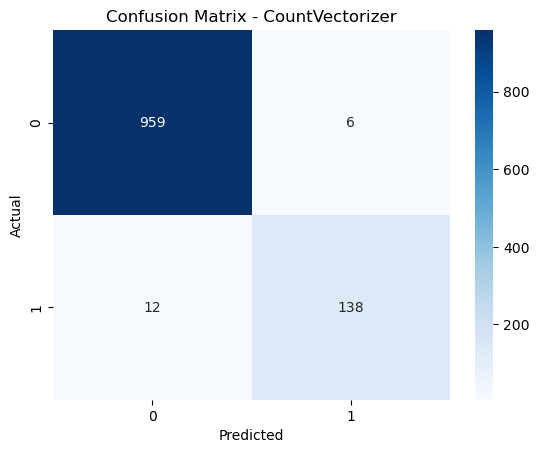

In [9]:
print("CountVectorizer Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_cv))
print("\nClassification Report:\n", classification_report(y_test, y_pred_cv))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_cv), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - CountVectorizer")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Feature Extraction (TF-IDF)

In [10]:
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("Shape of TF-IDF features:", X_train_tfidf.shape)

Shape of TF-IDF features: (4457, 7472)


## Train Multinomial Naive Bayes

In [11]:
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)

# Prediksi
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

## Evaluation

TF-IDF Model Evaluation
Accuracy: 0.9668161434977578

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



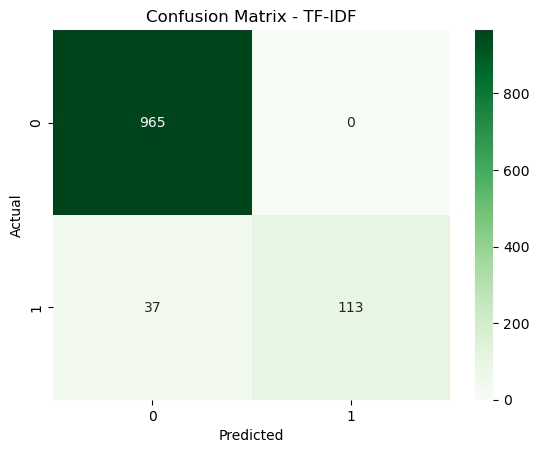

In [12]:
print("TF-IDF Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tfidf))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_tfidf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - TF-IDF")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Comparison 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24392\4015013229.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison, x='Model', y='Accuracy', palette='viridis')


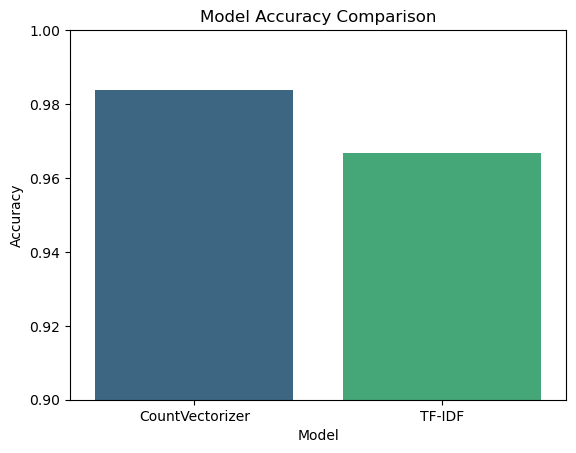

,Model,Accuracy
0,CountVectorizer,0.983857
1,TF-IDF,0.966816


In [13]:
acc_cv = accuracy_score(y_test, y_pred_cv)
acc_tfidf = accuracy_score(y_test, y_pred_tfidf)

comparison = pd.DataFrame({
    'Model': ['CountVectorizer', 'TF-IDF'],
    'Accuracy': [acc_cv, acc_tfidf]
})

sns.barplot(data=comparison, x='Model', y='Accuracy', palette='viridis')
plt.title("Model Accuracy Comparison")
plt.ylim(0.9, 1)
plt.show()

comparison

Based on the evaluation results, both models demonstrate strong performance in distinguishing between spam and ham messages. However, the TF-IDF model shows slightly higher accuracy and precision than the CountVectorizer model. This improvement occurs because TF-IDF not only measures word frequency but also accounts for each word’s significance across the dataset, minimizing the weight of common terms while highlighting rare yet informative ones. Consequently, TF-IDF features provide a more effective representation for text classification in the spam detection task using the spam.csv dataset.